In [3]:
!pip install pandas openpyxl

In [5]:
import pandas as pd

file_path = 'Copy of DegListWithExNum.xlsx'

sheet_name_to_load = 'All' 


try:
    
    df = pd.read_excel(file_path, sheet_name=sheet_name_to_load)
    
    print("--- File Loaded Successfully! ---")
    
  
    print("\n--- First 5 rows of your data (df.head()): ---")
    display(df.head()) 
    print("\n--- DataFrame Information (df.info()): ---")
    df.info()

except FileNotFoundError:
    print(f"ERROR: The file '{file_path}' was not found. ")
    print(f"An error occurred while trying to read the Excel file: {e}")
    print("This could be due to various reasons:")

--- File Loaded Successfully! ---

--- First 5 rows of your data (df.head()): ---


,geneID_sgA,geneID_sgB,geneName_sgA,geneName_sgB,exonCountA,exonCountB,chrom_sgA,chrom_sgB,baseMean,log2FoldChange_S11_Lsom,padj_S11_Lsom,log2FoldChange_S12_Prehatch,padj_S12_Prehatch
0,ENSCCRG00000063094,ENSCCRG00000065583,NaN,NaN,13,13,CAJNDQ010000037.1,CAJNDQ010000009.1,59.265132,22.682681,3.261358e-42,2.937430,2.589714e-02
1,ENSCCRG00000056663,ENSCCRG00000082183,ipo11,ipo11,30,28,CAJNDQ010000018.1,CAJNDQ010000024.1,1046.543287,12.752973,1.338535e-25,8.170216,5.928117e-79
2,ENSCCRG00000000292,ENSCCRG00000063159,umps,umps,6,6,CAJNDQ010000042.1,CAJNDQ010000047.1,362.356807,12.433650,2.379069e-23,11.709460,1.030165e-20
3,ENSCCRG00000051127,ENSCCRG00000008120,glra4b,glra4b,11,10,CAJNDQ010000008.1,CAJNDQ010000016.1,185.648183,12.346856,2.918256e-21,10.326651,1.281281e-25
4,ENSCCRG00000037419,ENSCCRG00000054023,NaN,NaN,23,3,CAJNDQ010000040.1,CAJNDQ010000027.1,934.050004,12.057213,7.661825e-23,12.546439,1.513019e-24



--- DataFrame Information (df.info()): ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9581 entries, 0 to 9580
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geneID_sgA                   9581 non-null   object 
 1   geneID_sgB                   9581 non-null   object 
 2   geneName_sgA                 7252 non-null   object 
 3   geneName_sgB                 7233 non-null   object 
 4   exonCountA                   9581 non-null   int64  
 5   exonCountB                   9581 non-null   int64  
 6   chrom_sgA                    9581 non-null   object 
 7   chrom_sgB                    9581 non-null   object 
 8   baseMean                     9581 non-null   float64
 9   log2FoldChange_S11_Lsom      9581 non-null   float64
 10  padj_S11_Lsom                9572 non-null   float64
 11  log2FoldChange_S12_Prehatch  9581 non-null   float64
 12  padj_S12_Prehatch            957

In [13]:
import pandas as pd

input_filename = 'filtered_ohnologs_basemean_150.csv'
output_filename = 'filtered_ohnologs_Lsom_L2FC_2_to_7.csv'


filter_column = 'log2FoldChange_S11_Lsom'
min_l2fc = 2
max_l2fc = 7

print(f"--- Filtering Ohnologs from '{input_filename}' ---")
print(f"Selecting pairs where {filter_column} is between {min_l2fc} and {max_l2fc}.")

try:
    
    df_base_filtered = pd.read_csv(input_filename)
    
    df_l2fc_subset = df_base_filtered[
        (df_base_filtered[filter_column] >= min_l2fc) & 
        (df_base_filtered[filter_column] <= max_l2fc)
    ].copy()
    
    num_found = len(df_l2fc_subset)
    
    if num_found > 0:
        print(f"\nFound {num_found} ohnolog pairs meeting the criteria.")
        df_l2fc_subset.to_csv(output_filename, index=False)
        
        print(f"Successfully saved the new subset to '{output_filename}'")
        print("\n--- First 5 rows of the new file: ---")
        display(df_l2fc_subset.head())
    else:
        print("\nNo ohnolog pairs were found within the specified Log2FoldChange range.")

except FileNotFoundError:
    print(f"\nERROR: The input file '{input_filename}' was not found.")
    print("run the previous script.")
except KeyError:
    print(f"\nERROR: The column '{filter_column}' was not found in the input file.")
    print("check the column names in CSV file")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")



--- Filtering Ohnologs from 'filtered_ohnologs_basemean_150.csv' ---
Selecting pairs where log2FoldChange_S11_Lsom is between 2 and 7.

Found 461 ohnolog pairs meeting the criteria.
Successfully saved the new subset to 'filtered_ohnologs_Lsom_L2FC_2_to_7.csv'

--- First 5 rows of the new file: ---


,geneID_sgA,geneID_sgB,geneName_sgA,geneName_sgB,exonCountA,exonCountB,chrom_sgA,chrom_sgB,baseMean,log2FoldChange_S11_Lsom,padj_S11_Lsom,log2FoldChange_S12_Prehatch,padj_S12_Prehatch
62,ENSCCRG00000032681,ENSCCRG00000055138,smarca2,smarca2,36,35,CAJNDQ010000008.1,CAJNDQ010000016.1,403.422478,6.933713,2.364578e-31,5.694481,1.068831e-33
63,ENSCCRG00000018267,ENSCCRG00000054275,ucp1,ucp1,8,7,CAJNDQ010000023.1,CAJNDQ010000028.1,730.414883,6.918003,1.183244e-17,1.551011,9.535967e-02
64,ENSCCRG00000071842,ENSCCRG00000068549,s100t,s100t,5,4,CAJNDQ010000003.1,CAJNDQ010000048.1,363.955377,6.748120,2.833944e-18,3.880095,5.282162e-07
65,ENSCCRG00000051962,ENSCCRG00000051921,NaN,NaN,16,13,CAJNDQ010000015.1,CAJNDQ010000041.1,171.343819,6.669697,1.211383e-37,4.525712,1.799772e-32
66,ENSCCRG00000041446,ENSCCRG00000059925,NaN,AADAT,14,10,CAJNDQ010000007.1,CAJNDQ010000001.1,596.890909,6.503502,2.811913e-47,6.295823,2.120537e-47


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


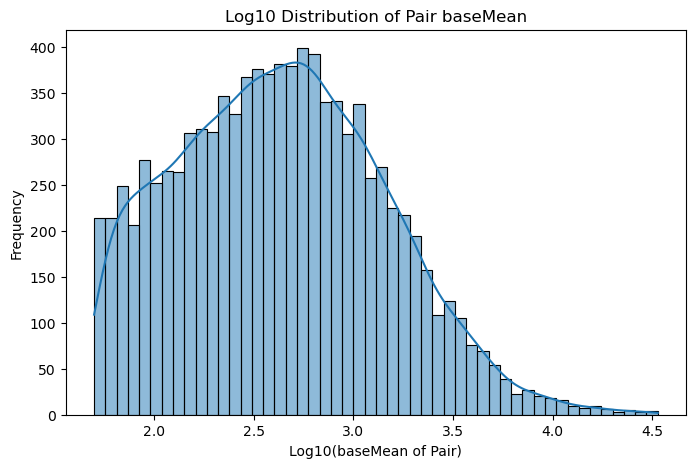

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Descriptive statistics for 'baseMean':
count     9581.000000
mean       935.112246
std       1824.181538
min         50.041632
25%        171.940833
50%        422.027145
75%        995.994212
max      33724.081873
Name: baseMean, dtype: float64


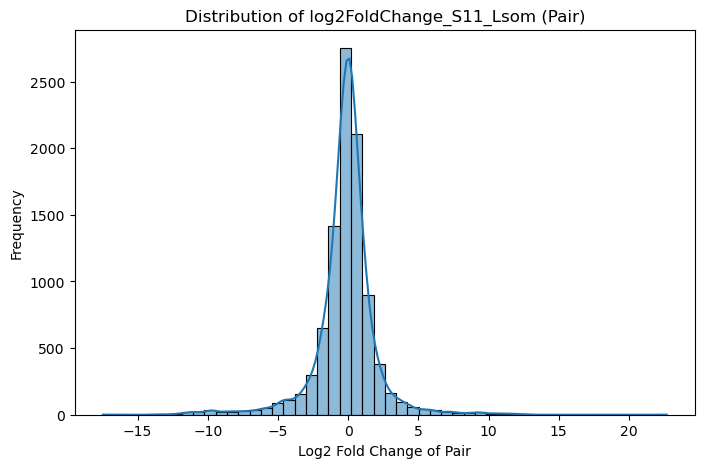


Descriptive statistics for 'log2FoldChange_S11_Lsom':
count    9581.000000
mean       -0.166612
std         2.240033
min       -17.467748
25%        -0.842052
50%        -0.042530
75%         0.699027
max        22.682681
Name: log2FoldChange_S11_Lsom, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


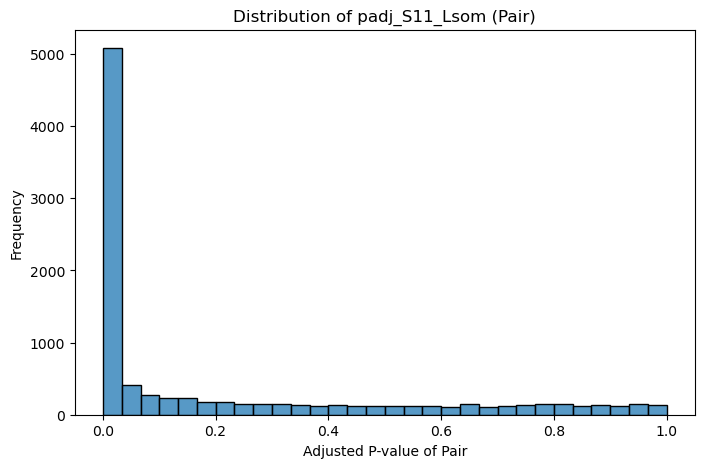


Descriptive statistics for 'padj_S11_Lsom':
count     9.572000e+03
mean      2.131334e-01
std       3.045731e-01
min      1.206864e-255
25%       3.170794e-07
50%       1.901431e-02
75%       3.762634e-01
max       1.000000e+00
Name: padj_S11_Lsom, dtype: float64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

base_mean_col = 'baseMean'
log2fc_lsom_col = 'log2FoldChange_S11_Lsom'
padj_lsom_col = 'padj_S11_Lsom'


plt.figure(figsize=(8, 5))
base_mean_to_plot = df[base_mean_col] + 1 if df[base_mean_col].min() == 0 else df[base_mean_col]
sns.histplot(np.log10(base_mean_to_plot.dropna()), bins=50, kde=True) # Added .dropna()
plt.title('Log10 Distribution of Pair baseMean')
plt.xlabel('Log10(baseMean of Pair)')
plt.ylabel('Frequency')
plt.show()
print(f"Descriptive statistics for '{base_mean_col}':")
print(df[base_mean_col].describe())

plt.figure(figsize=(8, 5))
sns.histplot(df[log2fc_lsom_col].dropna(), bins=50, kde=True)
plt.title(f'Distribution of {log2fc_lsom_col} (Pair)')
plt.xlabel('Log2 Fold Change of Pair')
plt.ylabel('Frequency')
plt.show()
print(f"\nDescriptive statistics for '{log2fc_lsom_col}':")
print(df[log2fc_lsom_col].describe())

plt.figure(figsize=(8, 5))
sns.histplot(df[padj_lsom_col].dropna(), bins=30, kde=False)
plt.title(f'Distribution of {padj_lsom_col} (Pair)')
plt.xlabel('Adjusted P-value of Pair')
plt.ylabel('Frequency')
plt.show()
print(f"\nDescriptive statistics for '{padj_lsom_col}':")
print(df[padj_lsom_col].describe())

In [9]:
import pandas as pd
import numpy as np 

base_mean_col = 'baseMean'
log2fc_lsom_col = 'log2FoldChange_S11_Lsom'
padj_lsom_col = 'padj_S11_Lsom'


baseMean_threshold_pair = 150  
padj_threshold_pair = 0.05    
log2fc_threshold_pair = 0.58  

print(f"--- Filtering for Late Somite Stage ---")
print(f"Using thresholds:")
print(f"  Pair baseMean >= {baseMean_threshold_pair}")
print(f"  Pair padj < {padj_threshold_pair}")
print(f"  Pair |Log2FoldChange| >= {log2fc_threshold_pair}")

df_lsom_analysis = df[df[base_mean_col] >= baseMean_threshold_pair].copy()

print(f"\nNumber of ohnolog pairs after baseMean filter: {len(df_lsom_analysis)} (out of {len(df)})")

if len(df_lsom_analysis) == 0:
    print("WARNING")
else:
  
    is_significant_by_padj = df_lsom_analysis[padj_lsom_col] < padj_threshold_pair
    is_meaningful_by_log2fc = abs(df_lsom_analysis[log2fc_lsom_col]) >= log2fc_threshold_pair

    df_lsom_analysis['is_DE_pair_Lsom'] = is_significant_by_padj & is_meaningful_by_log2fc
   
    df_lsom_analysis['DE_direction_pair_Lsom'] = 'Stable' 

    df_lsom_analysis.loc[
        (df_lsom_analysis['is_DE_pair_Lsom'] == True) & (df_lsom_analysis[log2fc_lsom_col] > 0),
        'DE_direction_pair_Lsom'
    ] = 'Up'

    df_lsom_analysis.loc[
        (df_lsom_analysis['is_DE_pair_Lsom'] == True) & (df_lsom_analysis[log2fc_lsom_col] < 0),
        'DE_direction_pair_Lsom'
    ] = 'Down'


    num_de_pairs_lsom = df_lsom_analysis['is_DE_pair_Lsom'].sum()

    print(f"\nNumber of ohnolog PAIRS significantly DE at Late Somite: {num_de_pairs_lsom}")

    print("\nDE Pair Direction Counts for Late Somite:")
    print(df_lsom_analysis['DE_direction_pair_Lsom'].value_counts())

    print("\n--- Example of significantly DE ohnolog Pairs at Late Somite (first 10): ---")
   
    relevant_cols_lsom = [base_mean_col, log2fc_lsom_col, padj_lsom_col, 'is_DE_pair_Lsom', 'DE_direction_pair_Lsom']
    
    de_pairs_lsom_df = df_lsom_analysis[df_lsom_analysis['is_DE_pair_Lsom']]
    if not de_pairs_lsom_df.empty:
        display(de_pairs_lsom_df[relevant_cols_lsom].head(10))
    else:
        print("No pairs were found to be DE with the current thresholds")


--- Filtering for Late Somite Stage ---
Using thresholds:
  Pair baseMean >= 150
  Pair padj < 0.05
  Pair |Log2FoldChange| >= 0.58

Number of ohnolog pairs after baseMean filter: 7497 (out of 9581)

Number of ohnolog PAIRS significantly DE at Late Somite: 3820

DE Pair Direction Counts for Late Somite:
DE_direction_pair_Lsom
Stable    3677
Down      1969
Up        1851
Name: count, dtype: int64

--- Example of significantly DE ohnolog PAIRS at Late Somite (first 10): ---


,baseMean,log2FoldChange_S11_Lsom,padj_S11_Lsom,is_DE_pair_Lsom,DE_direction_pair_Lsom
1,1046.543287,12.752973,1.338535e-25,True,Up
2,362.356807,12.433650,2.379069e-23,True,Up
3,185.648183,12.346856,2.918256e-21,True,Up
4,934.050004,12.057213,7.661825e-23,True,Up
5,353.311521,12.010048,2.564132e-22,True,Up
6,1743.916584,11.814825,6.435666e-134,True,Up
7,353.107519,11.802989,4.825760e-22,True,Up
9,375.537024,11.550082,2.164831e-20,True,Up
10,187.112328,11.463304,2.415398e-20,True,Up
11,658.353898,11.308852,4.138631e-20,True,Up


In [13]:
print("\n--- Example of significantly DE ohnolog PAIRS at Late Somite (first 10): ---")

annotation_cols = [
    "geneID_sgA", 
    "geneID_sgB", 
    "geneName_sgA", 
    "geneName_sgB", 
    "exonCountA", 
    "exonCountB", 
    "chrom_sgA", 
    "chrom_sgB"
]

de_stat_cols = [
    base_mean_col, 
    log2fc_lsom_col, 
    padj_lsom_col,   
    'is_DE_pair_Lsom',
    'DE_direction_pair_Lsom'
]

relevant_cols_lsom = []
for col in annotation_cols:
    if col in df_lsom_analysis.columns:
        relevant_cols_lsom.append(col)
    else:
        print(f"Warning: Annotation column '{col}' not found in DataFrame. It will not be displayed.")

relevant_cols_lsom = relevant_cols_lsom + de_stat_cols

de_pairs_lsom_df = df_lsom_analysis[df_lsom_analysis['is_DE_pair_Lsom']]

if not de_pairs_lsom_df.empty:
  
    existing_relevant_cols = [col for col in relevant_cols_lsom if col in de_pairs_lsom_df.columns]
    display(de_pairs_lsom_df[existing_relevant_cols].head(10))
else:
    print("No pairs were found to be DE with the current thresholds for Late Somite.")



--- Example of significantly DE ohnolog PAIRS at Late Somite (first 10): ---


,geneID_sgA,geneID_sgB,geneName_sgA,geneName_sgB,exonCountA,exonCountB,chrom_sgA,chrom_sgB,baseMean,log2FoldChange_S11_Lsom,padj_S11_Lsom,is_DE_pair_Lsom,DE_direction_pair_Lsom
1,ENSCCRG00000056663,ENSCCRG00000082183,ipo11,ipo11,30,28,CAJNDQ010000018.1,CAJNDQ010000024.1,1046.543287,12.752973,1.338535e-25,True,Up
2,ENSCCRG00000000292,ENSCCRG00000063159,umps,umps,6,6,CAJNDQ010000042.1,CAJNDQ010000047.1,362.356807,12.433650,2.379069e-23,True,Up
3,ENSCCRG00000051127,ENSCCRG00000008120,glra4b,glra4b,11,10,CAJNDQ010000008.1,CAJNDQ010000016.1,185.648183,12.346856,2.918256e-21,True,Up
4,ENSCCRG00000037419,ENSCCRG00000054023,NaN,NaN,23,3,CAJNDQ010000040.1,CAJNDQ010000027.1,934.050004,12.057213,7.661825e-23,True,Up
5,ENSCCRG00000060439,ENSCCRG00000003677,imp3,imp3,7,6,CAJNDQ010000022.1,CAJNDQ010000030.1,353.311521,12.010048,2.564132e-22,True,Up
6,ENSCCRG00000060370,ENSCCRG00000049072,fgg,fgg,9,10,CAJNDQ010000023.1,CAJNDQ010000028.1,1743.916584,11.814825,6.435666e-134,True,Up
7,ENSCCRG00000060660,ENSCCRG00000040170,NaN,NaN,18,8,CAJNDQ010000017.1,CAJNDQ010000011.1,353.107519,11.802989,4.825760e-22,True,Up
9,ENSCCRG00000057131,ENSCCRG00000014537,bdh2,bdh2,11,7,CAJNDQ010000023.1,CAJNDQ010000028.1,375.537024,11.550082,2.164831e-20,True,Up
10,ENSCCRG00000043153,ENSCCRG00000061611,ift88,ift88,28,14,CAJNDQ010000042.1,CAJNDQ010000047.1,187.112328,11.463304,2.415398e-20,True,Up
11,ENSCCRG00000006410,ENSCCRG00000006391,atp6v1c1b,atp6v1c1b,14,13,CAJNDQ010000032.1,CAJNDQ010000013.1,658.353898,11.308852,4.138631e-20,True,Up


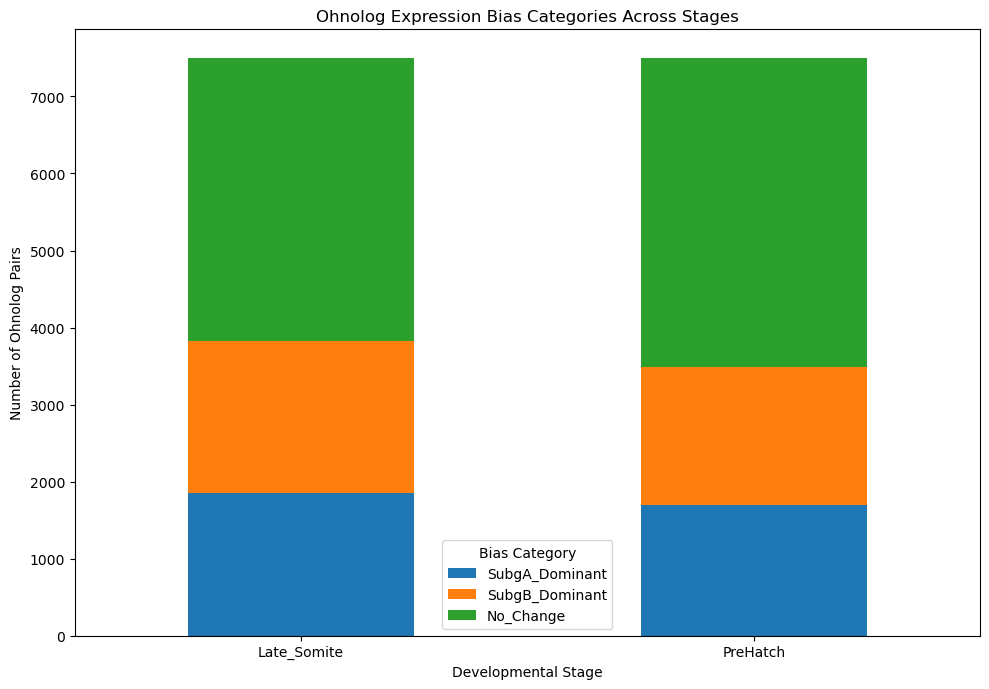

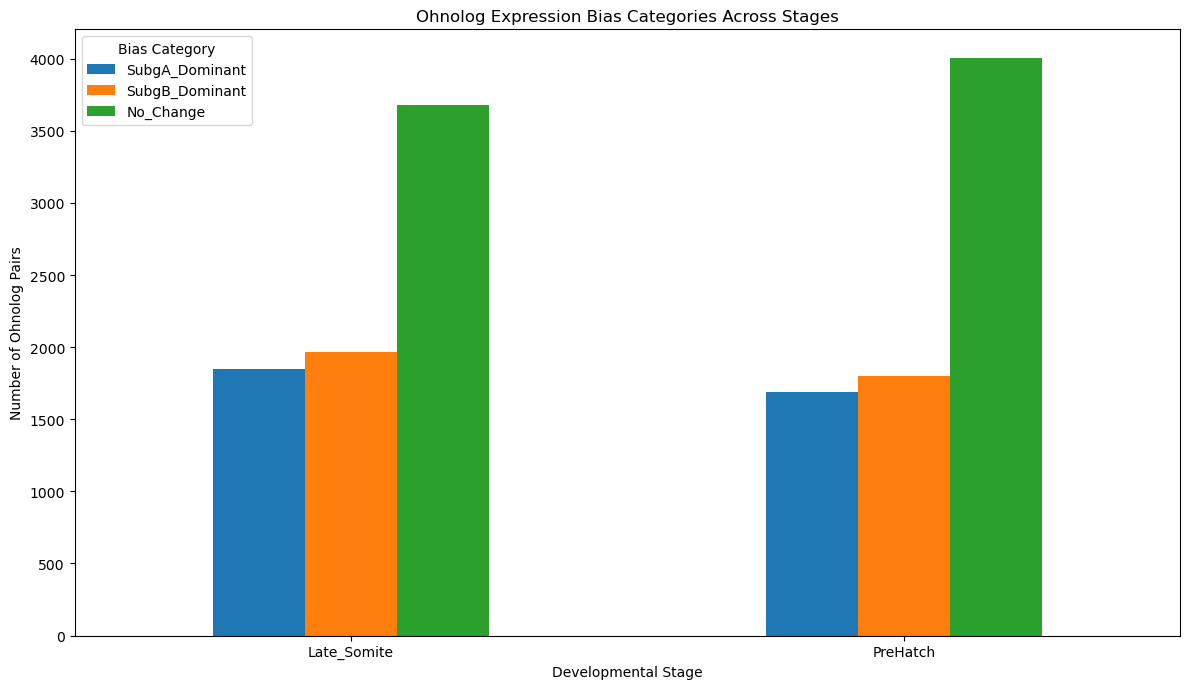

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lsom_counts = pd.Series({'No_Change': 3677, 'SubgB_Dominant': 1969, 'SubgA_Dominant': 1851}, name='Late_Somite')

preh_counts = pd.Series({'No_Change': 4004, 'SubgB_Dominant': 1803, 'SubgA_Dominant': 1690}, name='PreHatch')


comparison_counts_df = pd.DataFrame([lsom_counts, preh_counts])

category_order = ['SubgA_Dominant', 'SubgB_Dominant', 'No_Change']
comparison_counts_df = comparison_counts_df[category_order]

comparison_counts_df.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Ohnolog Expression Bias Categories Across Stages')
plt.ylabel('Number of Ohnolog Pairs')
plt.xlabel('Developmental Stage')
plt.xticks(rotation=0)
plt.legend(title='Bias Category')
plt.tight_layout()
plt.show()

comparison_counts_df.plot(kind='bar', stacked=False, figsize=(12, 7))
plt.title('Ohnolog Expression Bias Categories Across Stages')
plt.ylabel('Number of Ohnolog Pairs')
plt.xlabel('Developmental Stage')
plt.xticks(rotation=0)
plt.legend(title='Bias Category')
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
import numpy as np


LFC_THRESHOLD_X = 1.0  
LFC_THRESHOLD_Y = 2.0  
INITIAL_LFC_THRESHOLD = 0.58 

print(f"--- Stratifying Biased Pairs by Log2FC Magnitude for Late Somite ---")
print(f"Initial bias definition: |Log2FC| >= {INITIAL_LFC_THRESHOLD}")
print(f"Moderate Bias: {INITIAL_LFC_THRESHOLD} <= |Log2FC| < {LFC_THRESHOLD_X}")
print(f"Strong Bias: {LFC_THRESHOLD_X} <= |Log2FC| < {LFC_THRESHOLD_Y}")
print(f"Extreme Bias: |Log2FC| >= {LFC_THRESHOLD_Y}")


if 'Bias_Category_Lsom' not in df_lsom_analysis.columns:
    print("ERROR: 'Bias_Category_Lsom' column not found.")
else:
    df_lsom_analysis['Bias_Magnitude_Lsom'] = pd.NA 

    df_lsom_analysis.loc[
        (df_lsom_analysis['Bias_Category_Lsom'] == 'SubgA_Dominant_Lsom') &
        (df_lsom_analysis['log2FoldChange_S11_Lsom'] >= INITIAL_LFC_THRESHOLD) &
        (df_lsom_analysis['log2FoldChange_S11_Lsom'] < LFC_THRESHOLD_X),
        'Bias_Magnitude_Lsom'
    ] = 'Moderate_SubgA_Dom'

    df_lsom_analysis.loc[
        (df_lsom_analysis['Bias_Category_Lsom'] == 'SubgA_Dominant_Lsom') &
        (df_lsom_analysis['log2FoldChange_S11_Lsom'] >= LFC_THRESHOLD_X) &
        (df_lsom_analysis['log2FoldChange_S11_Lsom'] < LFC_THRESHOLD_Y),
        'Bias_Magnitude_Lsom'
    ] = 'Strong_SubgA_Dom'

    df_lsom_analysis.loc[
        (df_lsom_analysis['Bias_Category_Lsom'] == 'SubgA_Dominant_Lsom') &
        (df_lsom_analysis['log2FoldChange_S11_Lsom'] >= LFC_THRESHOLD_Y),
        'Bias_Magnitude_Lsom'
    ] = 'Extreme_SubgA_Dom'

    df_lsom_analysis.loc[
        (df_lsom_analysis['Bias_Category_Lsom'] == 'SubgB_Dominant_Lsom') &
        (abs(df_lsom_analysis['log2FoldChange_S11_Lsom']) >= INITIAL_LFC_THRESHOLD) & 
        (abs(df_lsom_analysis['log2FoldChange_S11_Lsom']) < LFC_THRESHOLD_X),
        'Bias_Magnitude_Lsom'
    ] = 'Moderate_SubgB_Dom'

    df_lsom_analysis.loc[
        (df_lsom_analysis['Bias_Category_Lsom'] == 'SubgB_Dominant_Lsom') &
        (abs(df_lsom_analysis['log2FoldChange_S11_Lsom']) >= LFC_THRESHOLD_X) &
        (abs(df_lsom_analysis['log2FoldChange_S11_Lsom']) < LFC_THRESHOLD_Y),
        'Bias_Magnitude_Lsom'
    ] = 'Strong_SubgB_Dom'

    df_lsom_analysis.loc[
        (df_lsom_analysis['Bias_Category_Lsom'] == 'SubgB_Dominant_Lsom') &
        (abs(df_lsom_analysis['log2FoldChange_S11_Lsom']) >= LFC_THRESHOLD_Y),
        'Bias_Magnitude_Lsom'
    ] = 'Extreme_SubgB_Dom'
    
    df_lsom_analysis.loc[
        df_lsom_analysis['Bias_Category_Lsom'] == 'No_Bias_Lsom',
        'Bias_Magnitude_Lsom'
    ] = 'No_Significant_Bias'

    print("\nCounts of Ohnolog Pairs by Bias Magnitude (Late Somite):")
    print(df_lsom_analysis['Bias_Magnitude_Lsom'].value_counts(dropna=False)) 

    annotation_cols = ["geneID_sgA", "geneID_sgB", "geneName_sgA", "geneName_sgB"] 
    cols_to_show = [col for col in annotation_cols if col in df_lsom_analysis.columns] + \
                   ['log2FoldChange_S11_Lsom', 'padj_S11_Lsom', 'Bias_Category_Lsom', 'Bias_Magnitude_Lsom']
    
    extreme_subga_dom_lsom = df_lsom_analysis[df_lsom_analysis['Bias_Magnitude_Lsom'] == 'Extreme_SubgA_Dom']
    if not extreme_subga_dom_lsom.empty:
        print("\n--- Example Pairs with Extreme SubgA Dominance (Late Somite): ---")
        display(extreme_subga_dom_lsom[cols_to_show].head())
    else:
        print("\nNo pairs found with Extreme SubgA Dominance using the current thresholds for Late Somite.")

--- Stratifying Biased Pairs by Log2FC Magnitude for Late Somite ---
Initial bias definition: |Log2FC| >= 0.58
Moderate Bias: 0.58 <= |Log2FC| < 1.0
Strong Bias: 1.0 <= |Log2FC| < 2.0
Extreme Bias: |Log2FC| >= 2.0

Counts of Ohnolog Pairs by Bias Magnitude (Late Somite):
Bias_Magnitude_Lsom
No_Significant_Bias    3677
Strong_SubgB_Dom        773
Strong_SubgA_Dom        752
Extreme_SubgB_Dom       666
Moderate_SubgA_Dom      581
Moderate_SubgB_Dom      530
Extreme_SubgA_Dom       518
Name: count, dtype: int64

--- Example Pairs with Extreme SubgA Dominance (Late Somite): ---


,geneID_sgA,geneID_sgB,geneName_sgA,geneName_sgB,log2FoldChange_S11_Lsom,padj_S11_Lsom,Bias_Category_Lsom,Bias_Magnitude_Lsom
1,ENSCCRG00000056663,ENSCCRG00000082183,ipo11,ipo11,12.752973,1.338535e-25,SubgA_Dominant_Lsom,Extreme_SubgA_Dom
2,ENSCCRG00000000292,ENSCCRG00000063159,umps,umps,12.433650,2.379069e-23,SubgA_Dominant_Lsom,Extreme_SubgA_Dom
3,ENSCCRG00000051127,ENSCCRG00000008120,glra4b,glra4b,12.346856,2.918256e-21,SubgA_Dominant_Lsom,Extreme_SubgA_Dom
4,ENSCCRG00000037419,ENSCCRG00000054023,NaN,NaN,12.057213,7.661825e-23,SubgA_Dominant_Lsom,Extreme_SubgA_Dom
5,ENSCCRG00000060439,ENSCCRG00000003677,imp3,imp3,12.010048,2.564132e-22,SubgA_Dominant_Lsom,Extreme_SubgA_Dom


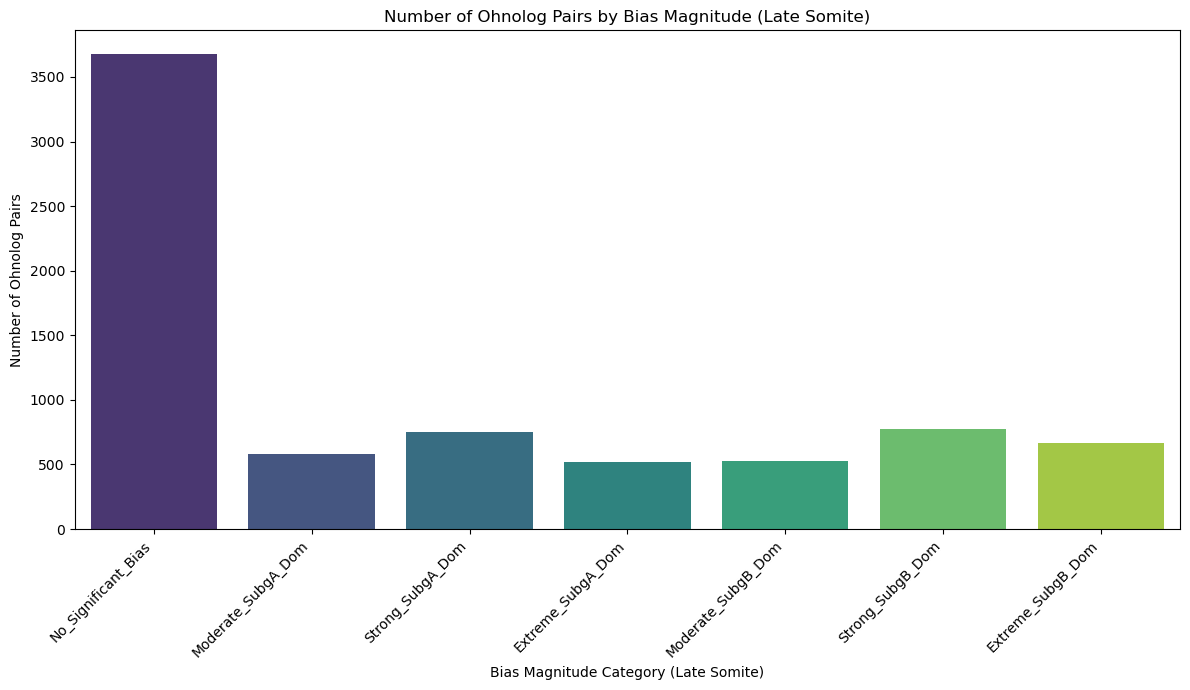

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

counts_data = {
    'No_Significant_Bias': 3677,
    'Strong_SubgB_Dom': 773,
    'Strong_SubgA_Dom': 752,
    'Extreme_SubgB_Dom': 666,
    'Moderate_SubgA_Dom': 581,
    'Moderate_SubgB_Dom': 530,
    'Extreme_SubgA_Dom': 518
}
counts_series = pd.Series(counts_data, name='Count')
counts_df = counts_series.reset_index().rename(columns={'index': 'Bias_Magnitude_Lsom'})

category_order_overview = [
    'No_Significant_Bias',
    'Moderate_SubgA_Dom', 'Strong_SubgA_Dom', 'Extreme_SubgA_Dom',
    'Moderate_SubgB_Dom', 'Strong_SubgB_Dom', 'Extreme_SubgB_Dom'
]
category_order_overview_present = [cat for cat in category_order_overview if cat in counts_df['Bias_Magnitude_Lsom'].tolist()]


plt.figure(figsize=(12, 7))
sns.barplot(x='Bias_Magnitude_Lsom', y='Count', data=counts_df, order=category_order_overview_present, palette="viridis")
plt.title('Number of Ohnolog Pairs by Bias Magnitude (Late Somite)')
plt.xlabel('Bias Magnitude Category (Late Somite)')
plt.ylabel('Number of Ohnolog Pairs')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

INITIAL_LFC_THRESHOLD = 0.58 
LFC_THRESHOLD_X = 1.0        
LFC_THRESHOLD_Y = 2.0        

print(f"--- Stratifying Biased Pairs by Log2FC Magnitude for PreHatch Stage ---")
print(f"Initial bias definition: |Log2FC| >= {INITIAL_LFC_THRESHOLD}")
print(f"Moderate Bias: {INITIAL_LFC_THRESHOLD} <= |Log2FC| < {LFC_THRESHOLD_X}")
print(f"Strong Bias: {LFC_THRESHOLD_X} <= |Log2FC| < {LFC_THRESHOLD_Y}")
print(f"Extreme Bias: |Log2FC| >= {LFC_THRESHOLD_Y}")

if 'Bias_Category_Prehatch' not in df_preh_analysis.columns:
    print("ERROR: 'Bias_Category_Prehatch' column not found in df_preh_analysis.")
    print("Please ensure you've created this column by mapping 'DE_direction_pair_Prehatch'.")

else:
    df_preh_analysis['Bias_Magnitude_Prehatch'] = pd.NA

    df_preh_analysis.loc[
        (df_preh_analysis['Bias_Category_Prehatch'] == 'SubgA_Dominant_Prehatch') &
        (df_preh_analysis['log2FoldChange_S12_Prehatch'] >= INITIAL_LFC_THRESHOLD) &
        (df_preh_analysis['log2FoldChange_S12_Prehatch'] < LFC_THRESHOLD_X),
        'Bias_Magnitude_Prehatch'
    ] = 'Moderate_SubgA_Dom'

    df_preh_analysis.loc[
        (df_preh_analysis['Bias_Category_Prehatch'] == 'SubgA_Dominant_Prehatch') &
        (df_preh_analysis['log2FoldChange_S12_Prehatch'] >= LFC_THRESHOLD_X) &
        (df_preh_analysis['log2FoldChange_S12_Prehatch'] < LFC_THRESHOLD_Y),
        'Bias_Magnitude_Prehatch'
    ] = 'Strong_SubgA_Dom'

    df_preh_analysis.loc[
        (df_preh_analysis['Bias_Category_Prehatch'] == 'SubgA_Dominant_Prehatch') &
        (df_preh_analysis['log2FoldChange_S12_Prehatch'] >= LFC_THRESHOLD_Y),
        'Bias_Magnitude_Prehatch'
    ] = 'Extreme_SubgA_Dom'

    df_preh_analysis.loc[
        (df_preh_analysis['Bias_Category_Prehatch'] == 'SubgB_Dominant_Prehatch') &
        (abs(df_preh_analysis['log2FoldChange_S12_Prehatch']) >= INITIAL_LFC_THRESHOLD) &
        (abs(df_preh_analysis['log2FoldChange_S12_Prehatch']) < LFC_THRESHOLD_X),
        'Bias_Magnitude_Prehatch'
    ] = 'Moderate_SubgB_Dom'

    df_preh_analysis.loc[
        (df_preh_analysis['Bias_Category_Prehatch'] == 'SubgB_Dominant_Prehatch') &
        (abs(df_preh_analysis['log2FoldChange_S12_Prehatch']) >= LFC_THRESHOLD_X) &
        (abs(df_preh_analysis['log2FoldChange_S12_Prehatch']) < LFC_THRESHOLD_Y),
        'Bias_Magnitude_Prehatch'
    ] = 'Strong_SubgB_Dom'

    df_preh_analysis.loc[
        (df_preh_analysis['Bias_Category_Prehatch'] == 'SubgB_Dominant_Prehatch') &
        (abs(df_preh_analysis['log2FoldChange_S12_Prehatch']) >= LFC_THRESHOLD_Y),
        'Bias_Magnitude_Prehatch'
    ] = 'Extreme_SubgB_Dom'
    
    df_preh_analysis.loc[
        df_preh_analysis['Bias_Category_Prehatch'] == 'No_Bias_Prehatch',
        'Bias_Magnitude_Prehatch'
    ] = 'No_Significant_Bias'

    print("\nCounts of Ohnolog Pairs by Bias Magnitude (PreHatch Stage):")
    prehatch_magnitude_counts = df_preh_analysis['Bias_Magnitude_Prehatch'].value_counts(dropna=False)
    print(prehatch_magnitude_counts)


--- Stratifying Biased Pairs by Log2FC Magnitude for PreHatch Stage ---
Initial bias definition: |Log2FC| >= 0.58
Moderate Bias: 0.58 <= |Log2FC| < 1.0
Strong Bias: 1.0 <= |Log2FC| < 2.0
Extreme Bias: |Log2FC| >= 2.0
ERROR: 'Bias_Category_Prehatch' column not found in df_preh_analysis.
Please ensure you've created this column by mapping 'DE_direction_pair_Prehatch'.


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

INITIAL_LFC_THRESHOLD = 0.58 
LFC_THRESHOLD_X = 1.0       
LFC_THRESHOLD_Y = 2.0        

print(f"--- Stratifying Biased Pairs by Log2FC Magnitude for PreHatch Stage ---")
print(f"Initial bias definition: |Log2FC| >= {INITIAL_LFC_THRESHOLD}")
print(f"Moderate Bias: {INITIAL_LFC_THRESHOLD} <= |Log2FC| < {LFC_THRESHOLD_X}")
print(f"Strong Bias: {LFC_THRESHOLD_X} <= |Log2FC| < {LFC_THRESHOLD_Y}")
print(f"Extreme Bias: |Log2FC| >= {LFC_THRESHOLD_Y}")

if 'Bias_Category_Prehatch' not in df_preh_analysis.columns:
    print("ERROR: 'Bias_Category_Prehatch' column not found in df_preh_analysis.")
    print("ensure mapping of 'DE_direction_pair_Prehatch'.")
else:
   
    df_preh_analysis['Bias_Magnitude_Prehatch'] = pd.NA

    df_preh_analysis.loc[
        (df_preh_analysis['Bias_Category_Prehatch'] == 'SubgA_Dominant_Prehatch') &
        (df_preh_analysis['log2FoldChange_S12_Prehatch'] >= INITIAL_LFC_THRESHOLD) &
        (df_preh_analysis['log2FoldChange_S12_Prehatch'] < LFC_THRESHOLD_X),
        'Bias_Magnitude_Prehatch'
    ] = 'Moderate_SubgA_Dom'

    df_preh_analysis.loc[
        (df_preh_analysis['Bias_Category_Prehatch'] == 'SubgA_Dominant_Prehatch') &
        (df_preh_analysis['log2FoldChange_S12_Prehatch'] >= LFC_THRESHOLD_X) &
        (df_preh_analysis['log2FoldChange_S12_Prehatch'] < LFC_THRESHOLD_Y),
        'Bias_Magnitude_Prehatch'
    ] = 'Strong_SubgA_Dom'

    df_preh_analysis.loc[
        (df_preh_analysis['Bias_Category_Prehatch'] == 'SubgA_Dominant_Prehatch') &
        (df_preh_analysis['log2FoldChange_S12_Prehatch'] >= LFC_THRESHOLD_Y),
        'Bias_Magnitude_Prehatch'
    ] = 'Extreme_SubgA_Dom'

    df_preh_analysis.loc[
        (df_preh_analysis['Bias_Category_Prehatch'] == 'SubgB_Dominant_Prehatch') &
        (abs(df_preh_analysis['log2FoldChange_S12_Prehatch']) >= INITIAL_LFC_THRESHOLD) &
        (abs(df_preh_analysis['log2FoldChange_S12_Prehatch']) < LFC_THRESHOLD_X),
        'Bias_Magnitude_Prehatch'
    ] = 'Moderate_SubgB_Dom'

    df_preh_analysis.loc[
        (df_preh_analysis['Bias_Category_Prehatch'] == 'SubgB_Dominant_Prehatch') &
        (abs(df_preh_analysis['log2FoldChange_S12_Prehatch']) >= LFC_THRESHOLD_X) &
        (abs(df_preh_analysis['log2FoldChange_S12_Prehatch']) < LFC_THRESHOLD_Y),
        'Bias_Magnitude_Prehatch'
    ] = 'Strong_SubgB_Dom'

    df_preh_analysis.loc[
        (df_preh_analysis['Bias_Category_Prehatch'] == 'SubgB_Dominant_Prehatch') &
        (abs(df_preh_analysis['log2FoldChange_S12_Prehatch']) >= LFC_THRESHOLD_Y),
        'Bias_Magnitude_Prehatch'
    ] = 'Extreme_SubgB_Dom'
    
    df_preh_analysis.loc[
        df_preh_analysis['Bias_Category_Prehatch'] == 'No_Bias_Prehatch',
        'Bias_Magnitude_Prehatch'
    ] = 'No_Significant_Bias'

    print("\nCounts of Ohnolog Pairs by Bias Magnitude (PreHatch Stage):")
    prehatch_magnitude_counts = df_preh_analysis['Bias_Magnitude_Prehatch'].value_counts(dropna=False)
    print(prehatch_magnitude_counts)


--- Stratifying Biased Pairs by Log2FC Magnitude for PreHatch Stage ---
Initial bias definition: |Log2FC| >= 0.58
Moderate Bias: 0.58 <= |Log2FC| < 1.0
Strong Bias: 1.0 <= |Log2FC| < 2.0
Extreme Bias: |Log2FC| >= 2.0

Counts of Ohnolog Pairs by Bias Magnitude (PreHatch Stage):
Bias_Magnitude_Prehatch
No_Significant_Bias    4004
Strong_SubgA_Dom        686
Strong_SubgB_Dom        683
Moderate_SubgA_Dom      595
Extreme_SubgB_Dom       586
Moderate_SubgB_Dom      534
Extreme_SubgA_Dom       409
Name: count, dtype: int64


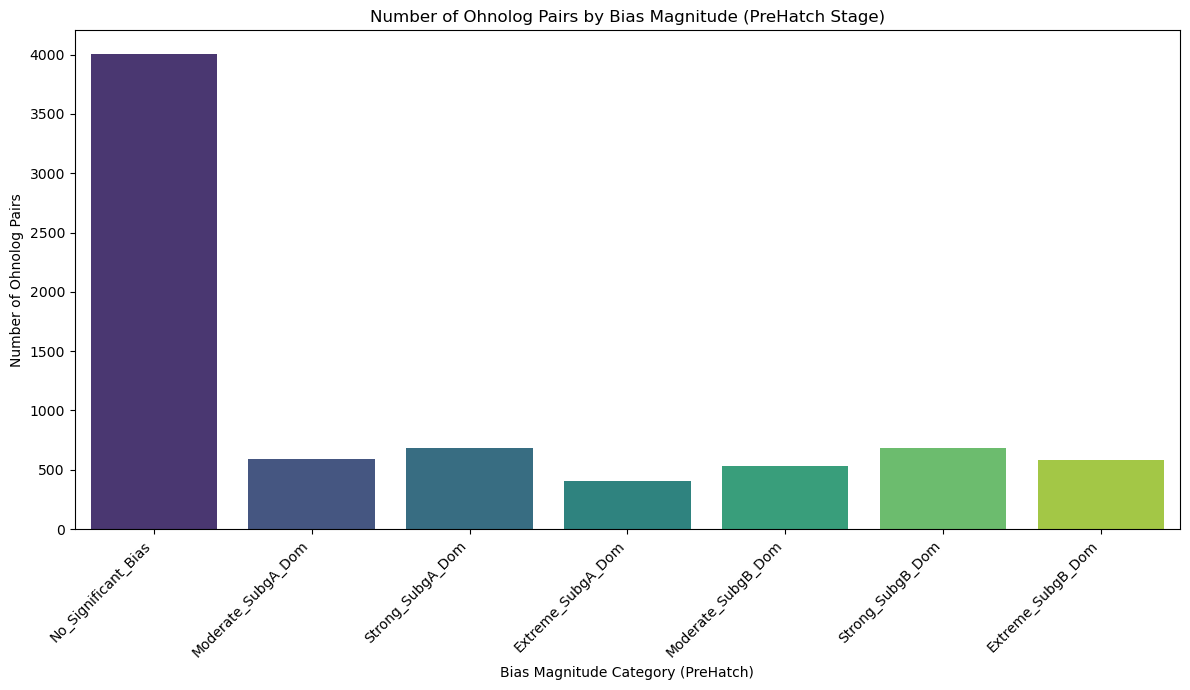

In [45]:
if 'prehatch_magnitude_counts' in locals() and not prehatch_magnitude_counts.empty:
    counts_df_preh = prehatch_magnitude_counts.reset_index().rename(columns={'index': 'Bias_Magnitude_Prehatch', 'count': 'Count'})

    category_order_overview = [
        'No_Significant_Bias',
        'Moderate_SubgA_Dom', 'Strong_SubgA_Dom', 'Extreme_SubgA_Dom',
        'Moderate_SubgB_Dom', 'Strong_SubgB_Dom', 'Extreme_SubgB_Dom'
    ]
    category_order_overview_present_preh = [cat for cat in category_order_overview if cat in counts_df_preh['Bias_Magnitude_Prehatch'].tolist()]

    plt.figure(figsize=(12, 7))
    sns.barplot(x='Bias_Magnitude_Prehatch', y='Count', data=counts_df_preh, order=category_order_overview_present_preh, palette="viridis")
    plt.title('Number of Ohnolog Pairs by Bias Magnitude (PreHatch Stage)')
    plt.xlabel('Bias Magnitude Category (PreHatch)')
    plt.ylabel('Number of Ohnolog Pairs')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No data or counts available for PreHatch magnitude plotting.")

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

lsom_cols_to_merge = ['Bias_Category_Lsom', 'Bias_Magnitude_Lsom', 'log2FoldChange_S11_Lsom']
preh_cols_to_merge = ['Bias_Category_Prehatch', 'Bias_Magnitude_Prehatch', 'log2FoldChange_S12_Prehatch']

actual_lsom_cols_to_merge = [col for col in lsom_cols_to_merge if col in df_lsom_analysis.columns]
actual_preh_cols_to_merge = [col for col in preh_cols_to_merge if col in df_preh_analysis.columns]

df_comparison_base = df_lsom_analysis.copy() 

    df_comparison_base, 
    df_preh_analysis[actual_preh_cols_to_merge], 
    left_index=True,
    right_index=True,
    how='inner', 
    suffixes=('', '_DROP') 
)
df_comparison = df_comparison[[col for col in df_comparison.columns if not '_DROP' in col]]


print("--- Consolidated DataFrame for Comparison ---")
print(f"Number of pairs in comparison DataFrame: {len(df_comparison)}")


check_display_cols = []
if 'baseMean' in df_comparison.columns:
    check_display_cols.append('baseMean')
check_display_cols.extend(actual_lsom_cols_to_merge)
check_display_cols.extend(actual_preh_cols_to_merge)

user_desired_annotations = [
    "geneID_sgA", "geneID_sgB", 
    "geneName_sgA", "geneName_sgB" 
]
prepend_annotations = []
for col in user_desired_annotations:
    if col in df_comparison.columns and col not in check_display_cols:
        prepend_annotations.append(col)

final_cols_to_display_check = prepend_annotations + check_display_cols

unique_final_cols_to_display = []
seen_cols = set()
for col in final_cols_to_display_check:
    if col in df_comparison.columns and col not in seen_cols:
        unique_final_cols_to_display.append(col)
        seen_cols.add(col)

if not unique_final_cols_to_display: # If list is empty, show some defaults
    unique_final_cols_to_display = df_comparison.columns[:min(5, len(df_comparison.columns))].tolist()

print(f"\nDisplaying head with columns: {unique_final_cols_to_display}")
display(df_comparison[unique_final_cols_to_display].head())

if 'Bias_Magnitude_Lsom' in df_comparison.columns:

    if 'Bias_Category_Lsom' in df_comparison.columns:
         df_comparison.loc[df_comparison['Bias_Category_Lsom'] == 'No_Bias_Lsom', 'Bias_Magnitude_Lsom'] = \
             df_comparison.loc[df_comparison['Bias_Category_Lsom'] == 'No_Bias_Lsom', 'Bias_Magnitude_Lsom'].fillna('No_Significant_Bias')

if 'Bias_Magnitude_Prehatch' in df_comparison.columns:
    if 'Bias_Category_Prehatch' in df_comparison.columns:
        df_comparison.loc[df_comparison['Bias_Category_Prehatch'] == 'No_Bias_Prehatch', 'Bias_Magnitude_Prehatch'] = \
            df_comparison.loc[df_comparison['Bias_Category_Prehatch'] == 'No_Bias_Prehatch', 'Bias_Magnitude_Prehatch'].fillna('No_Significant_Bias')

--- Consolidated DataFrame for Comparison ---
Number of pairs in comparison DataFrame: 7497

Displaying head with columns: ['geneID_sgA', 'geneID_sgB', 'geneName_sgA', 'geneName_sgB', 'baseMean', 'Bias_Category_Lsom', 'Bias_Magnitude_Lsom', 'log2FoldChange_S11_Lsom', 'Bias_Category_Prehatch', 'Bias_Magnitude_Prehatch', 'log2FoldChange_S12_Prehatch']


,geneID_sgA,geneID_sgB,geneName_sgA,geneName_sgB,baseMean,Bias_Category_Lsom,Bias_Magnitude_Lsom,log2FoldChange_S11_Lsom,Bias_Category_Prehatch,Bias_Magnitude_Prehatch,log2FoldChange_S12_Prehatch
1,ENSCCRG00000056663,ENSCCRG00000082183,ipo11,ipo11,1046.543287,SubgA_Dominant_Lsom,Extreme_SubgA_Dom,12.752973,SubgA_Dominant_Prehatch,Extreme_SubgA_Dom,8.170216
2,ENSCCRG00000000292,ENSCCRG00000063159,umps,umps,362.356807,SubgA_Dominant_Lsom,Extreme_SubgA_Dom,12.433650,SubgA_Dominant_Prehatch,Extreme_SubgA_Dom,11.709460
3,ENSCCRG00000051127,ENSCCRG00000008120,glra4b,glra4b,185.648183,SubgA_Dominant_Lsom,Extreme_SubgA_Dom,12.346856,SubgA_Dominant_Prehatch,Extreme_SubgA_Dom,10.326651
4,ENSCCRG00000037419,ENSCCRG00000054023,NaN,NaN,934.050004,SubgA_Dominant_Lsom,Extreme_SubgA_Dom,12.057213,SubgA_Dominant_Prehatch,Extreme_SubgA_Dom,12.546439
5,ENSCCRG00000060439,ENSCCRG00000003677,imp3,imp3,353.311521,SubgA_Dominant_Lsom,Extreme_SubgA_Dom,12.010048,SubgA_Dominant_Prehatch,Extreme_SubgA_Dom,11.554930


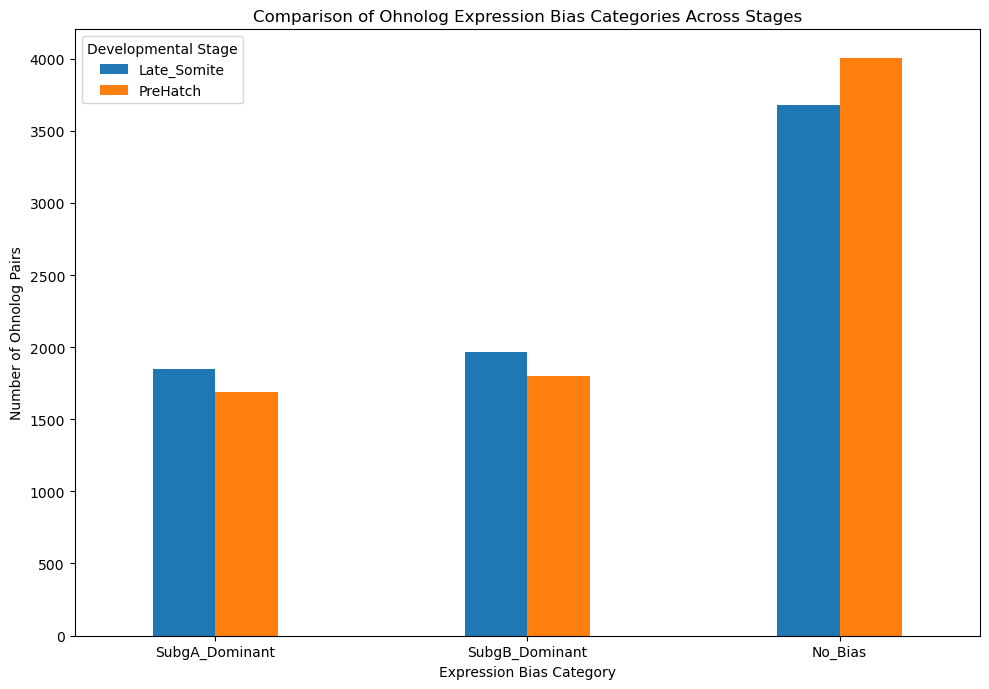

In [51]:

if 'Bias_Category_Lsom' in df_comparison.columns and 'Bias_Category_Prehatch' in df_comparison.columns:
    df_comparison['Clean_Bias_Lsom'] = df_comparison['Bias_Category_Lsom'].str.replace('_Lsom', '')
    df_comparison['Clean_Bias_Prehatch'] = df_comparison['Bias_Category_Prehatch'].str.replace('_Prehatch', '')

    lsom_counts_compare = df_comparison['Clean_Bias_Lsom'].value_counts()
    preh_counts_compare = df_comparison['Clean_Bias_Prehatch'].value_counts()

    comparison_df = pd.DataFrame({'Late_Somite': lsom_counts_compare, 'PreHatch': preh_counts_compare}).fillna(0)
    
    bias_type_order = ['SubgA_Dominant', 'SubgB_Dominant', 'No_Bias']
    bias_type_order_present = [cat for cat in bias_type_order if cat in comparison_df.index]
    
    if not comparison_df.empty and len(bias_type_order_present) > 0:
        comparison_df.loc[bias_type_order_present].plot(kind='bar', figsize=(10, 7), position=0.5, width=0.4) # grouped
        plt.title('Comparison of Ohnolog Expression Bias Categories Across Stages')
        plt.ylabel('Number of Ohnolog Pairs')
        plt.xlabel('Expression Bias Category')
        plt.xticks(rotation=0)
        plt.legend(title='Developmental Stage')
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough data")
else:
    print("Required bias category columns for LSom or PreHatch not found")


--- Transition of Bias Categories from Late Somite to PreHatch ---


Clean_Bias_Prehatch,SubgA_Dominant,SubgB_Dominant,No_Bias
Clean_Bias_Lsom,,,
SubgA_Dominant,1403,11,437
SubgB_Dominant,11,1529,429
No_Bias,276,263,3138


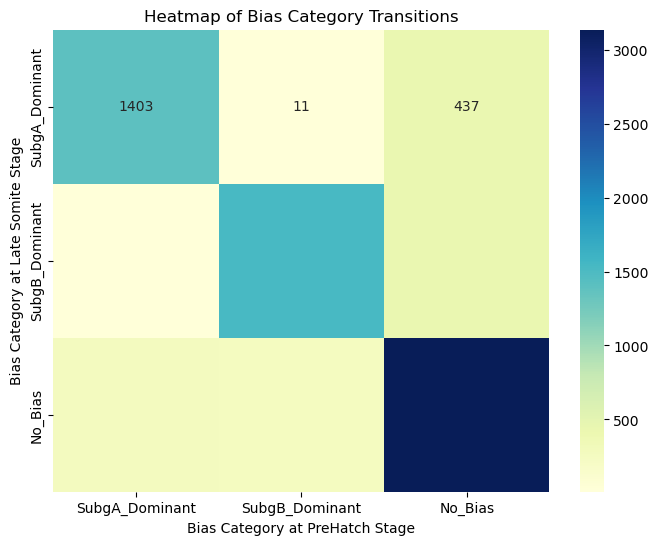

In [53]:
if 'Clean_Bias_Lsom' in df_comparison.columns and 'Clean_Bias_Prehatch' in df_comparison.columns:
    transition_table = pd.crosstab(df_comparison['Clean_Bias_Lsom'], df_comparison['Clean_Bias_Prehatch'])
    
    cat_order = ['SubgA_Dominant', 'SubgB_Dominant', 'No_Bias'] 
    cat_order_present_rows = [c for c in cat_order if c in transition_table.index]
    cat_order_present_cols = [c for c in cat_order if c in transition_table.columns]

    if not transition_table.empty and len(cat_order_present_rows) > 0 and len(cat_order_present_cols) > 0:
        transition_table = transition_table.reindex(index=cat_order_present_rows, columns=cat_order_present_cols, fill_value=0)

        print("\n--- Transition of Bias Categories from Late Somite to PreHatch ---")
        display(transition_table)

        plt.figure(figsize=(8, 6))
        sns.heatmap(transition_table, annot=True, fmt='d', cmap="YlGnBu") 
        plt.title('Heatmap of Bias Category Transitions')
        plt.xlabel('Bias Category at PreHatch Stage')
        plt.ylabel('Bias Category at Late Somite Stage')
        plt.show()
    else:
        print("Not enough data")
else:
    print("Cleaned bias category columns for LSom or PreHatch not found")

In [1]:
if 'log2FoldChange_S11_Lsom' in df_comparison.columns and 'log2FoldChange_S12_Prehatch' in df_comparison.columns:
    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=df_comparison, 
                    x='log2FoldChange_S11_Lsom', 
                    y='log2FoldChange_S12_Prehatch', 
                    alpha=0.5, 
                    edgecolor=None) 

    plt.title('Comparison of Ohnolog Expression Bias (Log2FC) Between Stages')
    plt.xlabel('Log2(OhnologA/OhnologB) at Late Somite')
    plt.ylabel('Log2(OhnologA/OhnologB) at PreHatch')
    plt.axhline(0, color='grey', linestyle='--')
    plt.axvline(0, color='grey', linestyle='--')
    

    log2fc_threshold_used = 0.58 
    plt.axhline(log2fc_threshold_used, color='lightgrey', linestyle=':')
    plt.axhline(-log2fc_threshold_used, color='lightgrey', linestyle=':')
    plt.axvline(log2fc_threshold_used, color='lightgrey', linestyle=':')
    plt.axvline(-log2fc_threshold_used, color='lightgrey', linestyle=':')
    
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.show()
else:
    print("Log2FoldChange columns for LSom or PreHatch not found")

NameError: name 'df_comparison' is not defined

In [59]:
import numpy as np
from scipy.stats import chi2_contingency

lsom_counts = np.array([1851, 1969, 3677]) 

preh_counts = np.array([1690, 1803, 4004]) 

observed_table = np.array([lsom_counts, preh_counts])

print("--- Contingency Table (Observed Frequencies) ---")
print("Rows: [Late Somite, PreHatch]")
print("Columns: [SubgA_Dominant, SubgB_Dominant, No_Bias]")
print(observed_table)


chi2_statistic, p_value, degrees_of_freedom, expected_frequencies = chi2_contingency(observed_table)

print("\n--- Chi-squared Test Results ---")
print(f"Chi-squared Statistic: {chi2_statistic:.4f}")
print(f"P-value: {p_value:.4g}") 
print(f"Degrees of Freedom: {degrees_of_freedom}")
print("\nExpected Frequencies Table (if H0 were true):")
print(expected_frequencies)


alpha = 0.05 
print(f"\n--- Interpretation (at alpha = {alpha}) ---")
if p_value < alpha:
    print(f"P-value ({p_value:.4g}) is less than alpha ({alpha}).")
    print("We reject the null hypothesis.")
    print("Conclusion: There is a statistically significant association between developmental stage and the distribution of ohnolog expression bias categories.")
    print("This suggests that the pattern of ohnolog expression bias (SubgA Dominant, SubgB Dominant, No Bias) changes significantly from Late Somite to PreHatch.")
else:
    print(f"P-value ({p_value:.4g}) is greater than or equal to alpha ({alpha}).")
    print("We fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant association between developmental stage and the distribution of ohnolog expression bias categories.")
    print("This suggests that the overall pattern of ohnolog expression bias does not change significantly from Late Somite to PreHatch with the current data.")

--- Contingency Table (Observed Frequencies) ---
Rows: [Late Somite, PreHatch]
Columns: [SubgA_Dominant, SubgB_Dominant, No_Bias]
[[1851 1969 3677]
 [1690 1803 4004]]

--- Chi-squared Test Results ---
Chi-squared Statistic: 28.5469
P-value: 6.326e-07
Degrees of Freedom: 2

Expected Frequencies Table (if H0 were true):
[[1770.5 1886.  3840.5]
 [1770.5 1886.  3840.5]]

--- Interpretation (at alpha = 0.05) ---
P-value (6.326e-07) is less than alpha (0.05).
We reject the null hypothesis.
Conclusion: There is a statistically significant association between developmental stage and the distribution of ohnolog expression bias categories.
This suggests that the pattern of ohnolog expression bias (SubgA Dominant, SubgB Dominant, No Bias) changes significantly from Late Somite to PreHatch.


In [61]:
import numpy as np
from scipy.stats import chi2_contingency

n_SubgA_Lsom = 1851
n_SubgB_Lsom = 1969
n_NoBias_Lsom = 3677


n_SubgA_Preh = 1690
n_SubgB_Preh = 1803
n_NoBias_Preh = 4004

num_tests = 3
alpha = 0.05
bonferroni_alpha = alpha / num_tests
print(f"--- Bonferroni Corrected Alpha for significance: {bonferroni_alpha:.4f} ---")

other_Lsom_1 = n_SubgB_Lsom + n_NoBias_Lsom
other_Preh_1 = n_SubgB_Preh + n_NoBias_Preh
table1 = np.array([[n_SubgA_Lsom, other_Lsom_1],
                   [n_SubgA_Preh, other_Preh_1]])

print("\n--- Test 1: SubgA_Dominant vs. Others ---")
print("Contingency Table:")
print(table1)
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(table1)
print(f"Chi-squared: {chi2_1:.4f}, P-value: {p_1:.4g}")
if p_1 < bonferroni_alpha:
    print(f"Significant (p < {bonferroni_alpha:.4f}): The proportion of SubgA_Dominant pairs (vs. all other categories combined) changes significantly between stages.")
else:
    print(f"Not significant (p >= {bonferroni_alpha:.4f}): No significant change in the proportion of SubgA_Dominant pairs (vs. others) between stages.")

other_Lsom_2 = n_SubgA_Lsom + n_NoBias_Lsom
other_Preh_2 = n_SubgA_Preh + n_NoBias_Preh
table2 = np.array([[n_SubgB_Lsom, other_Lsom_2],
                   [n_SubgB_Preh, other_Preh_2]])

print("\n--- Test 2: SubgB_Dominant vs. Others ---")
print("Contingency Table:")
print(table2)
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(table2)
print(f"Chi-squared: {chi2_2:.4f}, P-value: {p_2:.4g}")
if p_2 < bonferroni_alpha:
    print(f"Significant (p < {bonferroni_alpha:.4f}): The proportion of SubgB_Dominant pairs (vs. all other categories combined) changes significantly between stages.")
else:
    print(f"Not significant (p >= {bonferroni_alpha:.4f}): No significant change in the proportion of SubgB_Dominant pairs (vs. others) between stages.")

other_Lsom_3 = n_SubgA_Lsom + n_SubgB_Lsom 
other_Preh_3 = n_SubgA_Preh + n_SubgB_Preh 
table3 = np.array([[n_NoBias_Lsom, other_Lsom_3],
                   [n_NoBias_Preh, other_Preh_3]])

print("\n--- Test 3: No_Bias vs. Others (All Biased) ---")
print("Contingency Table:")
print(table3)
chi2_3, p_3, dof_3, expected_3 = chi2_contingency(table3)
print(f"Chi-squared: {chi2_3:.4f}, P-value: {p_3:.4g}")
if p_3 < bonferroni_alpha:
    print(f"Significant (p < {bonferroni_alpha:.4f}): The proportion of No_Bias pairs (vs. all biased categories combined) changes significantly between stages.")
else:
    print(f"Not significant (p >= {bonferroni_alpha:.4f}): No significant change in the proportion of No_Bias pairs (vs. all biased) between stages.")

--- Bonferroni Corrected Alpha for significance: 0.0167 ---

--- Test 1: SubgA_Dominant vs. Others ---
Contingency Table:
[[1851 5646]
 [1690 5807]]
Chi-squared: 9.4648, P-value: 0.002095
Significant (p < 0.0167): The proportion of SubgA_Dominant pairs (vs. all other categories combined) changes significantly between stages.

--- Test 2: SubgB_Dominant vs. Others ---
Contingency Table:
[[1969 5528]
 [1803 5694]]
Chi-squared: 9.6437, P-value: 0.0019
Significant (p < 0.0167): The proportion of SubgB_Dominant pairs (vs. all other categories combined) changes significantly between stages.

--- Test 3: No_Bias vs. Others (All Biased) ---
Contingency Table:
[[3677 3820]
 [4004 3493]]
Chi-squared: 28.3687, P-value: 1.003e-07
Significant (p < 0.0167): The proportion of No_Bias pairs (vs. all biased categories combined) changes significantly between stages.


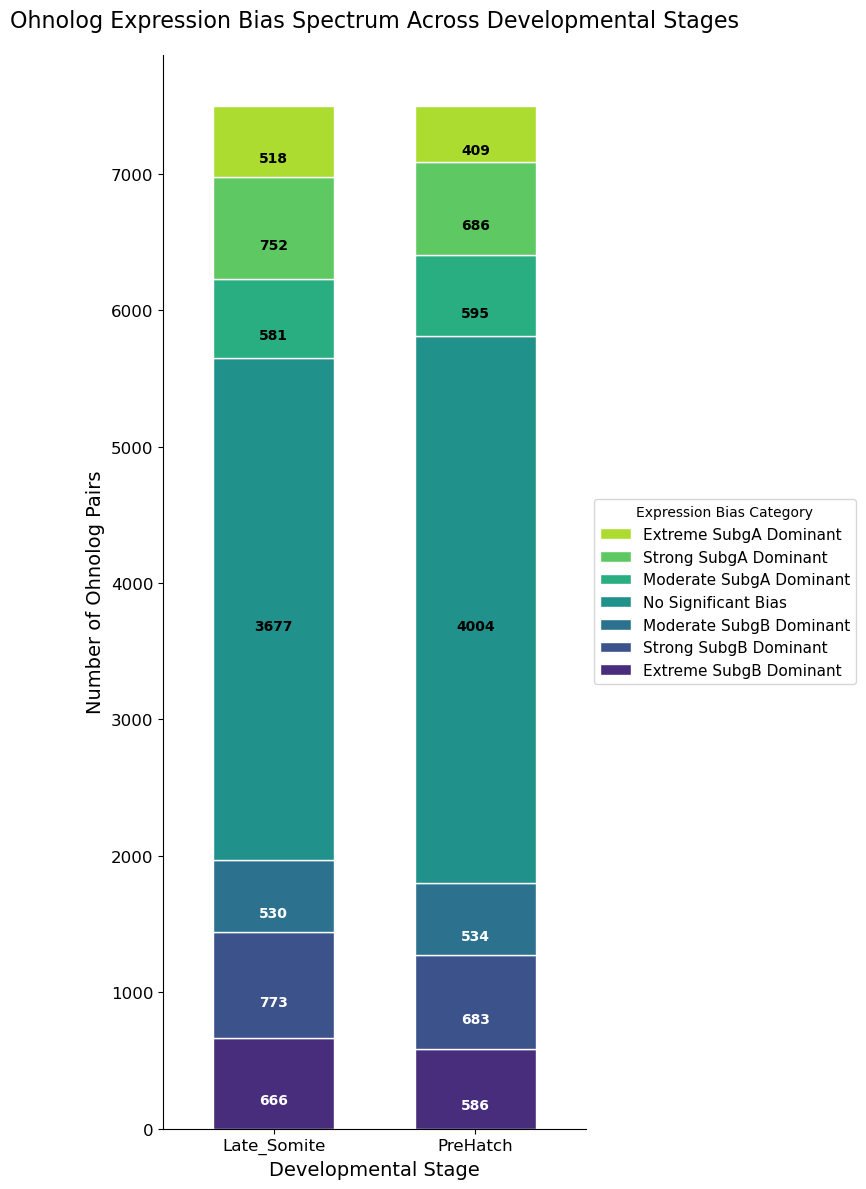

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Late_Somite': {
        'Extreme_SubgA_Dom': 518,
        'Strong_SubgA_Dom': 752,
        'Moderate_SubgA_Dom': 581,
        'No_Significant_Bias': 3677,
        'Moderate_SubgB_Dom': 530,
        'Strong_SubgB_Dom': 773,
        'Extreme_SubgB_Dom': 666
    },
    'PreHatch': {
        'Extreme_SubgA_Dom': 409,
        'Strong_SubgA_Dom': 686,
        'Moderate_SubgA_Dom': 595,
        'No_Significant_Bias': 4004,
        'Moderate_SubgB_Dom': 534,
        'Strong_SubgB_Dom': 683,
        'Extreme_SubgB_Dom': 586
    }
}

stacking_order = [
    'Extreme_SubgB_Dom',
    'Strong_SubgB_Dom',
    'Moderate_SubgB_Dom',
    'No_Significant_Bias',
    'Moderate_SubgA_Dom',
    'Strong_SubgA_Dom',
    'Extreme_SubgA_Dom'
]

df_plot = pd.DataFrame(data).reindex(stacking_order)

df_plot = df_plot[['Late_Somite', 'PreHatch']]


colors = sns.color_palette("viridis", 7)

ax = df_plot.T.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 12),
    color=colors,
    width=0.6,
    edgecolor='white'
)

for i, container in enumerate(ax.containers):
  
    label_color = 'black' if i > 2 else 'white'
    
    ax.bar_label(
        container,
        label_type='center',
        color=label_color,
        fontweight='bold',
        padding=-12, 
        fmt=lambda x: int(x) if x > (ax.get_ylim()[1] * 0.03) else ''
    )


ax.set_title('Ohnolog Expression Bias Spectrum Across Developmental Stages', fontsize=16, pad=20)
ax.set_ylabel('Number of Ohnolog Pairs', fontsize=14)
ax.set_xlabel('Developmental Stage', fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

legend_labels = [
    'Extreme SubgA Dominant',
    'Strong SubgA Dominant',
    'Moderate SubgA Dominant',
    'No Significant Bias',
    'Moderate SubgB Dominant',
    'Strong SubgB Dominant',
    'Extreme SubgB Dominant'
]
handles, _ = ax.get_legend_handles_labels()
ax.legend(
    reversed(handles),
    legend_labels,     
    title='Expression Bias Category',
    loc='center left',
    bbox_to_anchor=(1.0, 0.5),
    fontsize=11
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout(rect=[0, 0, 0.80, 1])

plt.show()


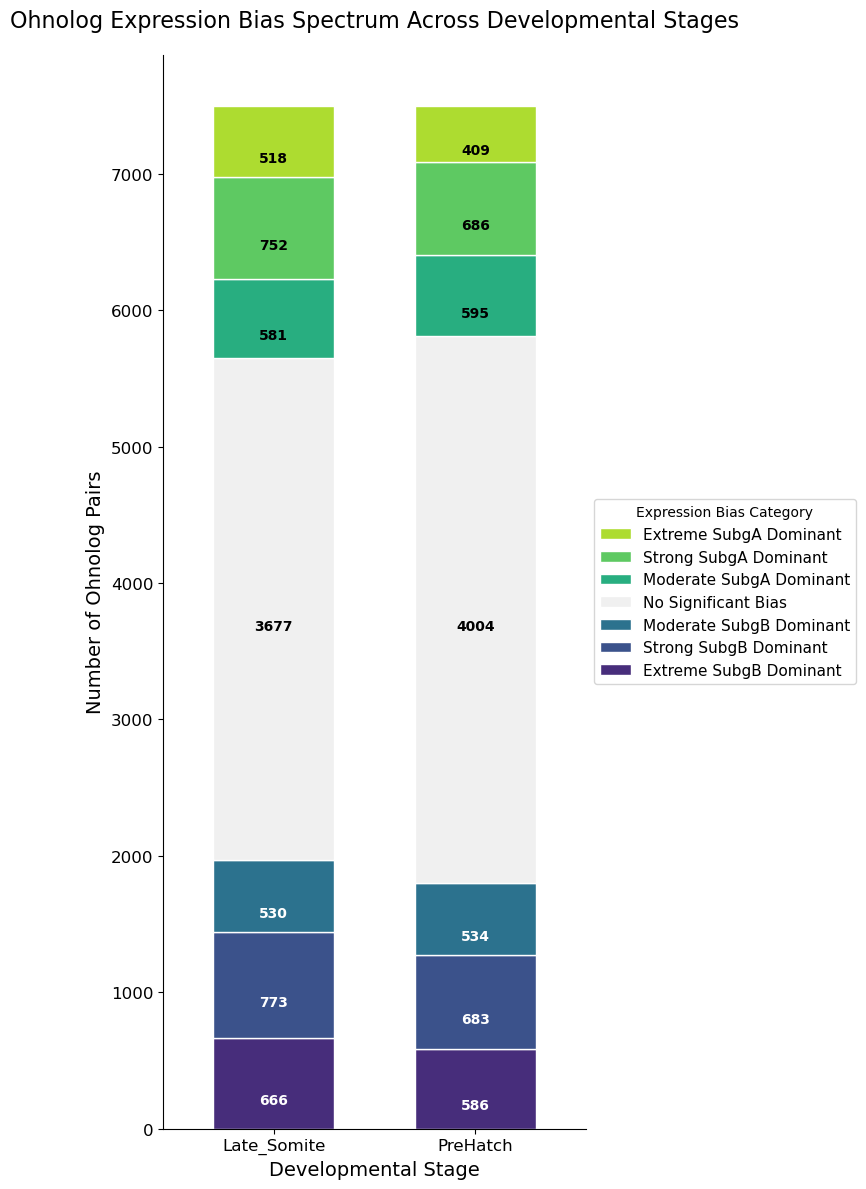

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Late_Somite': {
        'Extreme_SubgA_Dom': 518,
        'Strong_SubgA_Dom': 752,
        'Moderate_SubgA_Dom': 581,
        'No_Significant_Bias': 3677,
        'Moderate_SubgB_Dom': 530,
        'Strong_SubgB_Dom': 773,
        'Extreme_SubgB_Dom': 666
    },
    'PreHatch': {
        'Extreme_SubgA_Dom': 409,
        'Strong_SubgA_Dom': 686,
        'Moderate_SubgA_Dom': 595,
        'No_Significant_Bias': 4004,
        'Moderate_SubgB_Dom': 534,
        'Strong_SubgB_Dom': 683,
        'Extreme_SubgB_Dom': 586
    }
}

stacking_order = [
    'Extreme_SubgB_Dom',
    'Strong_SubgB_Dom',
    'Moderate_SubgB_Dom',
    'No_Significant_Bias',
    'Moderate_SubgA_Dom',
    'Strong_SubgA_Dom',
    'Extreme_SubgA_Dom'
]

df_plot = pd.DataFrame(data).reindex(stacking_order)

df_plot = df_plot[['Late_Somite', 'PreHatch']]


colors = sns.color_palette("viridis", 7)

colors[3] = '#f0f0f0' 

ax = df_plot.T.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 12),
    color=colors,
    width=0.6,
    edgecolor='white'
)


for i, container in enumerate(ax.containers):

    label_color = 'black' if i >= 3 else 'white'
    
    ax.bar_label(
        container,
        label_type='center',
        color=label_color,
        fontweight='bold',
        padding=-12, 
        fmt=lambda x: int(x) if x > (ax.get_ylim()[1] * 0.03) else ''
    )


ax.set_title('Ohnolog Expression Bias Spectrum Across Developmental Stages', fontsize=16, pad=20)
ax.set_ylabel('Number of Ohnolog Pairs', fontsize=14)
ax.set_xlabel('Developmental Stage', fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

legend_labels = [
    'Extreme SubgA Dominant',
    'Strong SubgA Dominant',
    'Moderate SubgA Dominant',
    'No Significant Bias',
    'Moderate SubgB Dominant',
    'Strong SubgB Dominant',
    'Extreme SubgB Dominant'
]
handles, _ = ax.get_legend_handles_labels()
ax.legend(
    reversed(handles), 
    legend_labels,     
    title='Expression Bias Category',
    loc='center left',
    bbox_to_anchor=(1.0, 0.5), 
    fontsize=11
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout(rect=[0, 0, 0.80, 1]) 

plt.show()